In [9]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from utils import read_data, int_enc, shuffle_Xy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
GPL = "GPL96"

In [11]:
data = read_data(f"data/{GPL}.csv")
data = int_enc(data)

X = data.drop(["label"], axis=1).values
y = data["label"].values

X = StandardScaler().fit_transform(X)
X, y = shuffle_Xy(X, y)

#### 10-fold cross validation

In [12]:
nn = MLPClassifier(hidden_layer_sizes=(50, 50, 50))
cv = cross_validate(nn, X, y, cv=10)
scores = cv["test_score"]

print("Avg. Score: {:.2f}".format(np.mean(scores)))
# save the results of 10-fold cv for analysis
np.save(f"results/NN{GPL}.npy", scores)

Avg. Score: 0.99


0.98 on GPL96

0.95 on GPL570

#### Confusion matrix

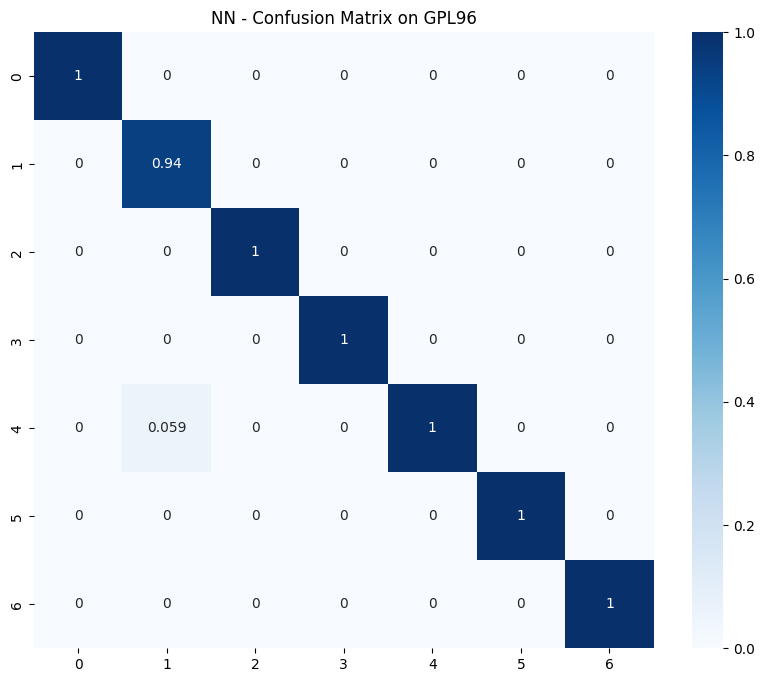

In [13]:
nn = MLPClassifier(hidden_layer_sizes=(50, 50, 50))

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=.30)

nn.fit(X_tr, y_tr)
yhat = nn.predict(X_te)
cmat = confusion_matrix(y_te, yhat)
cmat = cmat / np.sum(cmat, axis=0) # pct

plt.figure(figsize=(10, 8))
sns.heatmap(cmat, cmap="Blues", annot=True)
plt.title(f"NN - Confusion Matrix on {GPL}")
plt.savefig(f"results/NN{GPL}confusion.png")
plt.show()

#### ROC Curves

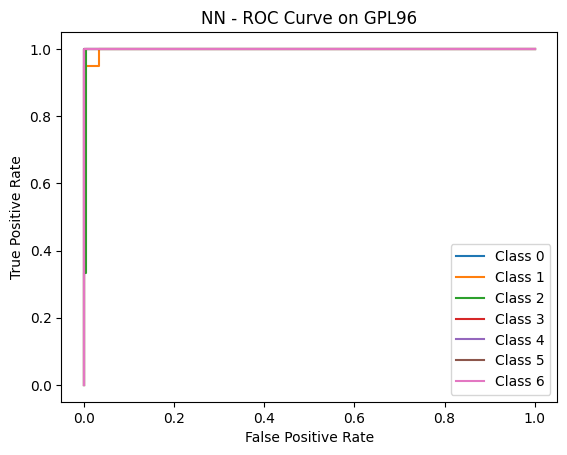

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(50, 50, 50))

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=.30)

nn.fit(X_tr, y_tr)
yhat = nn.predict_proba(X_te)

for i in range(len(np.unique(y))):
    
    fpr, tpr, _ = roc_curve(
        (y_te == i).astype(int),
        yhat[:, i]
    )

    plt.plot(fpr, tpr, label=f"Class {i}")

plt.figure(figsize=(10, 8))
plt.title(f"NN - ROC Curve on {GPL}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.savefig(f"results/NN{GPL}ROC.png")
plt.show()